# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="logo_uni.png" width="100" height="100/1.618">
<figure>

UNIVERSITÀ DEGLI STUDI DI TRENTO  
DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA  
A.A. 2022-2023
  
*Alunni:*  
Del Dò Giacomo, 221545  
Faccin Francesca, 222028  
Rossato Sofia, 218790

------

# **Notebook 2: WHETGEO1D con i dati di precipitazione della stazione di Vicenza**

Di seguito si riportano i risultati dello studio dell'infiltrazione delle precipitazioni misurate dalla stazione di Vicenza durante l'evento dell'alluvione del Veneto del 2010.  
Si è scelto di considerare i valori di precipitazione caduti nell'intervallo temporale che va dal 29/10/2010 al 06/11/2010.  

*Coordinate stazione Vicenza-"Sant'Agostino" (EPSG:4258): 11.52039317; 45.52434984 (longitudine;latitudine)*.

## **Alluvione del Veneto 2010**

L'alluvione del Veneto del 2010 si è verificata a seguito di una forte perturbazione che ha portato sulla regione persistenti piogge a partire dal 31 ottobre 2010 che, nelle zone prealpline e pedemontane, hanno fatto registrare altezze complessive di precipitazione superiori ai 300mm. A questa si è aggiunto anche il vento caldo di scirocco che, oltre a sciogliere la neve, ha impedito il normale deflusso dei fiumi in mare Adriatico portando così un'aumento delle portate dei principali fiumi del Veneto.  

Analizzando in particolare la situazione nella provincia di Vicenza si può osservare come nella mattinata dell'1 novembre 2010, dopo due giorni di piogge incessanti a cui si devono sommare gli effetti dello scioglimento delle nevi in montagna, il fiume Bacchiglione ha rotto gli argini prima nel comune di Caldogno allagando completamente i centri abitati limitrofi per poi esondare a Vicenza, allagando circa il 20% del territorio del capoluogo.

<figure>
    <img src="mappa_vicenza.png">
<figure>
    Fig.1 "Planimetria del centro urbano di Vicenza con indicazione delle aree allagate durante l'alluvione del 2010".

Dalle elaborazioni della Regione Veneto si osserva come i valori più alti di precipitazione cumulata si hanno nella parte Nord della regione. Il contributo delle piogge, sommato a tutti i fattori descritti prima, ha contribuito all'aumento delle portate nei fiumi delle pianure.  

<figure>
    <img src="precipitazione_cumulata.jpeg">
<figure>
    Fig.2 "Precipitazione cumulata nel Veneto tra il 31/10/2010 e il 02/11/2010"

## **Stratigrafia del suolo**

Si definisce la stratigrafia della colonna di suolo situata a Vicenza (*lat 45,56  long 11,525*) utilizzata per lo studio dell'infiltrazione.  

<figure>
    <img src="colonna_suolo.png">
<figure>
    Fig.3 "Profilo di suolo in analisi"

Si riporta poi la griglia computazionale che schematizza la colonna di suolo in esame.  
Per tutte le informazioni ed il procedimento della creazione della griglia si riporta al "Notebook1_Creazione_griglia.ipynb".  

<figure>
    <img src="ex00_griD.png">
<figure>
    Fig.4 "Griglia del profilo di suolo in analisi"

## **Stazione di Vicenza "Sant'Agostino"**

In questo punto si rappresentano graficamente le altezze di precipitazione e le altezze cumulate delle precipitazioni misurate dalla stazione di Vicenza "Sant'Agostino" nell'intervallo temporale che va dal 29/10/2010 al 06/11/2010, come già precedentemente specificato. 

In [1]:
import os
import math

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

from pandas import *
from datetime import datetime
%matplotlib inline 

In [2]:
project_path = os.path.dirname(os.getcwd())
project_path

'/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/2_infiltrazione/OMS_Project_WHETGEO1D_23'

In [3]:
precipitazioni_vi_input_file_name = project_path + '/data/Timeseries/precip_inon.csv'

data_vi = pd.read_csv(precipitazioni_vi_input_file_name)
map(datetime,data_vi['Date'])
data_vi = data_vi.set_index('Date')

#definisco la funzione cumulata delle altezze di precipitazione 
cumulati_vi = np.cumsum(data_vi['Rain'])

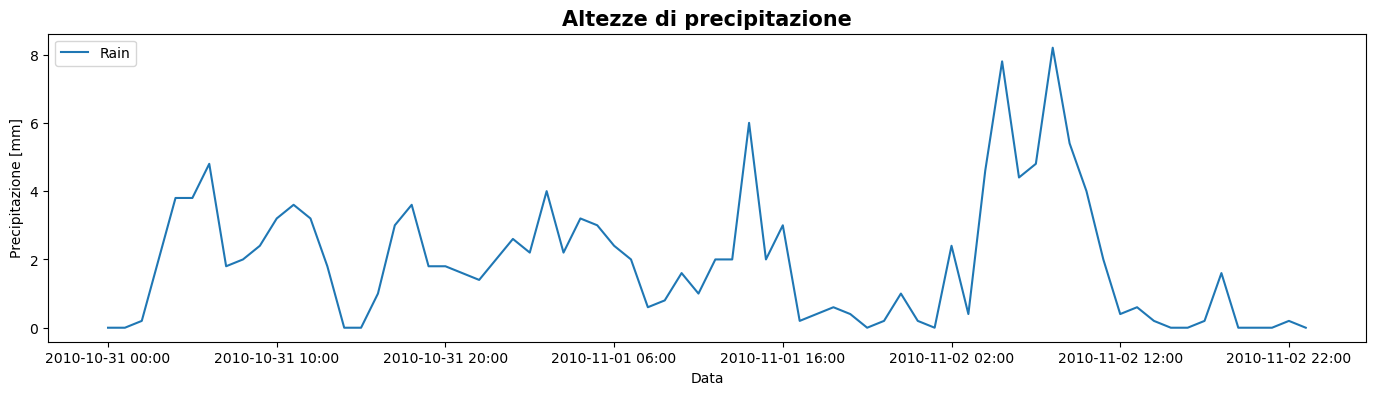

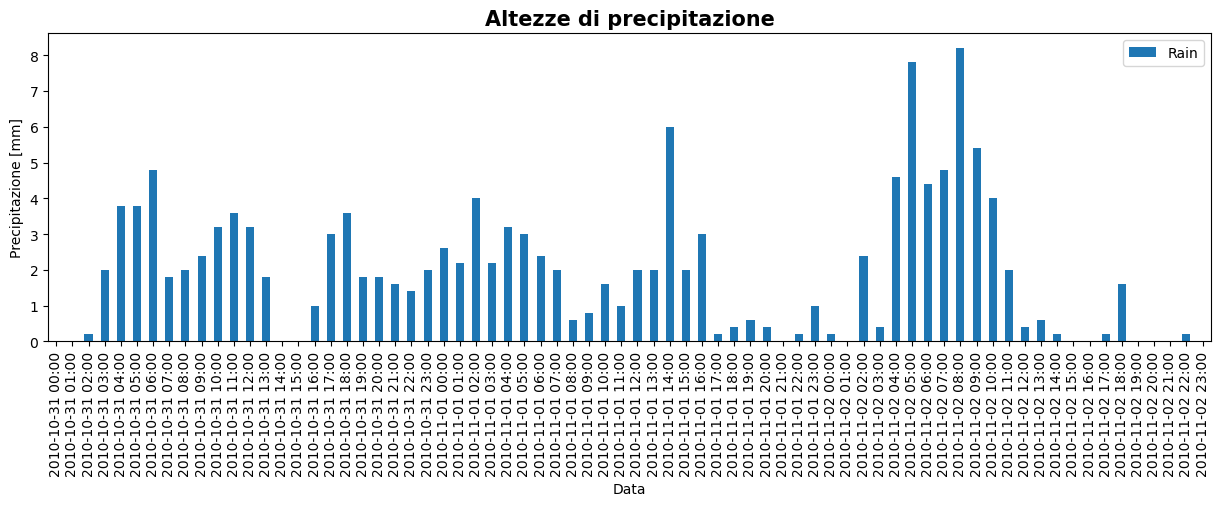

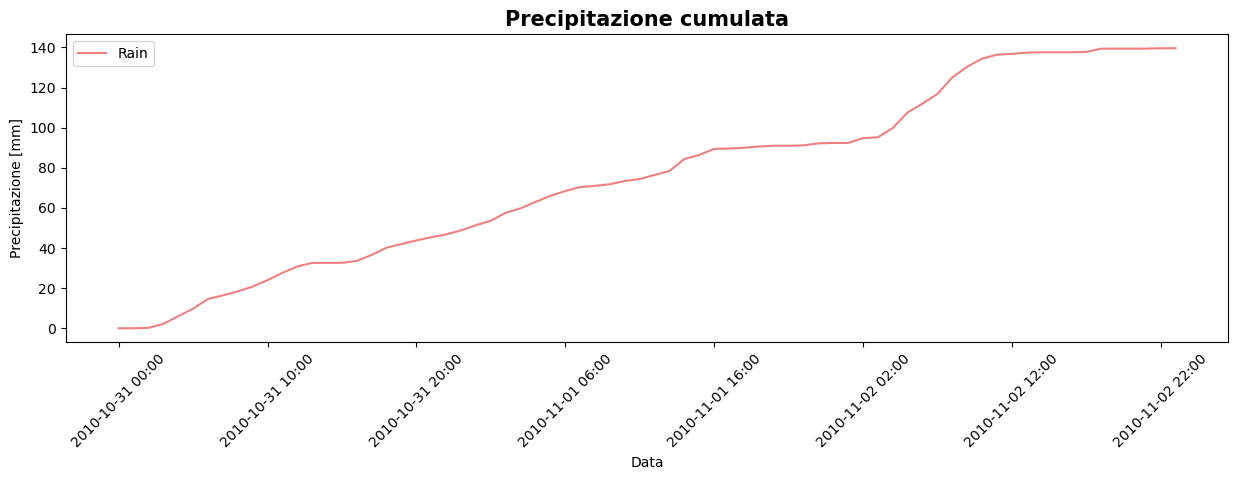

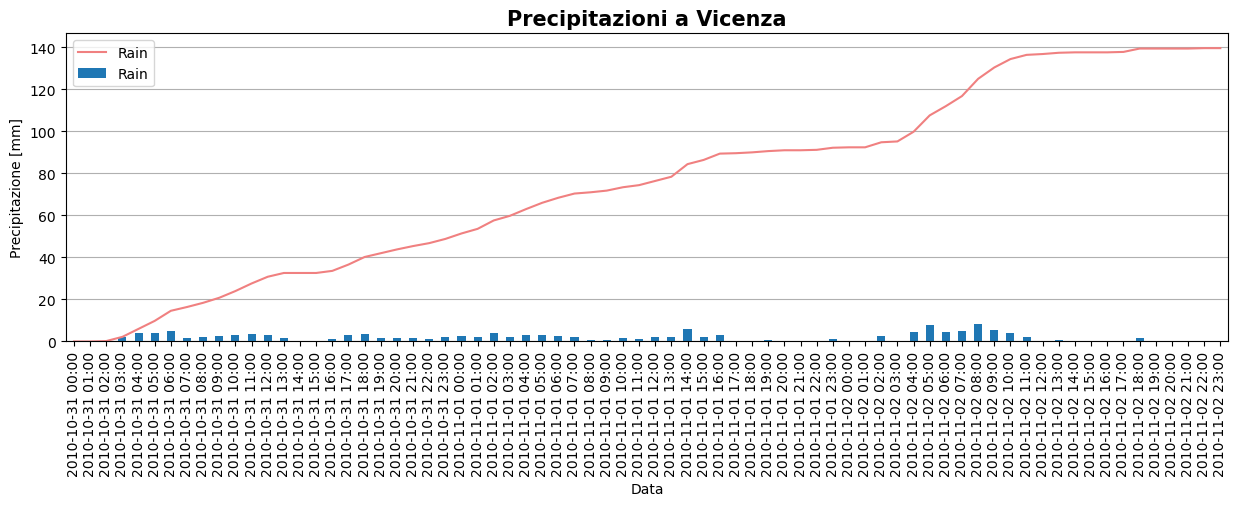

In [4]:
#grafico 1 
ax = data_vi.plot(figsize=(17,4), color= "tab:blue")
ax.grid(linestyle="None")
ax.set_title("Altezze di precipitazione", fontsize=15, fontweight = "bold")
ax.set_xlabel("Data", fontsize=10)
ax.set_ylabel("Precipitazione [mm]", fontsize=10)
plt.legend(loc='upper left')
plt.show()

#grafico 2 
ax1 = data_vi.plot.bar(figsize=(15,4), color='tab:blue')
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_title("Altezze di precipitazione", fontsize=15, fontweight = "bold")
ax1.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax1.set_xlabel("Data",  fontsize=10)
plt.legend()
plt.show()

#grafico 3
ax2 = cumulati_vi.plot(figsize=(15,4), color='lightcoral')
ax2.xaxis.set_tick_params(rotation=45)
ax2.set_title("Precipitazione cumulata", fontsize=15, fontweight = "bold")
ax2.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax2.set_xlabel("Data",  fontsize=10)
plt.legend()
plt.show()

#grafico 4 
ax3 = data_vi.plot.bar(figsize=(15,4), color='tab:blue')
ax3 = cumulati_vi.plot(figsize=(15,4), color='lightcoral')
ax3.xaxis.set_tick_params(rotation=90)
ax3.set_title("Precipitazioni a Vicenza", fontsize=15, fontweight = "bold")
ax3.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax3.set_xlabel("Data",  fontsize=10)
plt.grid(axis="y", linestyle='solid')
plt.legend()
plt.show()

## **Elaborazione dei dati**

Si esegue il modello WHETGEO1D usando la console OMS ed eseguendo le righe di codice che portano ad ottenere l'output "ex00_sof4_0000.nc".   
Si ottiene un output in cui sono contenute le informazioni riguardanti l'infiltrazione delle precipitazioni misurate dalla stazione Vicenza "Sant'Agostino" nel periodo che va dal 29/10/2010 al 06/11/2010, nella colonna di suolo di Vicenza.  

In [5]:
import matplotlib
import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
import matplotlib.style as style 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import xarray as xr

from matplotlib import rc
from geoframepy.timeseries import io_csv
%matplotlib inline

style.available
style.use('seaborn-whitegrid')

nice_fonts = {"legend.frameon": True,
              "legend.fancybox": True,
              "legend.facecolor": "white",
              "axes.edgecolor": "0.8",
              "axes.linewidth": 0.6,
              "grid.linewidth":0.4,
              "text.usetex": False,
              "font.family": "serif",
              "axes.labelsize": 12,
              "font.size": 12,
              "legend.fontsize": 10,
              "xtick.labelsize": 10,
              "ytick.labelsize": 10}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
ds = xr.open_dataset(project_path + '/output/ex00_sof4_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 161, dualDepth: 161, time: 192)
Coordinates:
  * depth             (depth) float64 -1.195 -1.185 -1.175 ... -0.002857 0.0
  * dualDepth         (dualDepth) float64 -1.2 -1.19 -1.18 ... -0.005714 -0.0
  * time              (time) datetime64[ns] 2010-10-29T01:00:00 ... 2010-11-06
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Free drainage
    path_top_boundary_condition:        C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    path_bottom_boundary_condition:     C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    path_grid:                          C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

Innanzitutto, si controlla l'errore per ciascun time step al fine di verificare che il bilancio di massa si chiuda. Il bilancio di massa è un'equazione fondamentale al fine di determinare il deflusso d'acqua nei suoli ed il suo grafico permette di osservare come questo bilancio non sia sempre rispettato, infatti si vede che nei vari instanti di tempo sono presenti degli errori più o meno grandi ma che comunque rientrano nell'ordine di grandezza di $e^{-11}$.

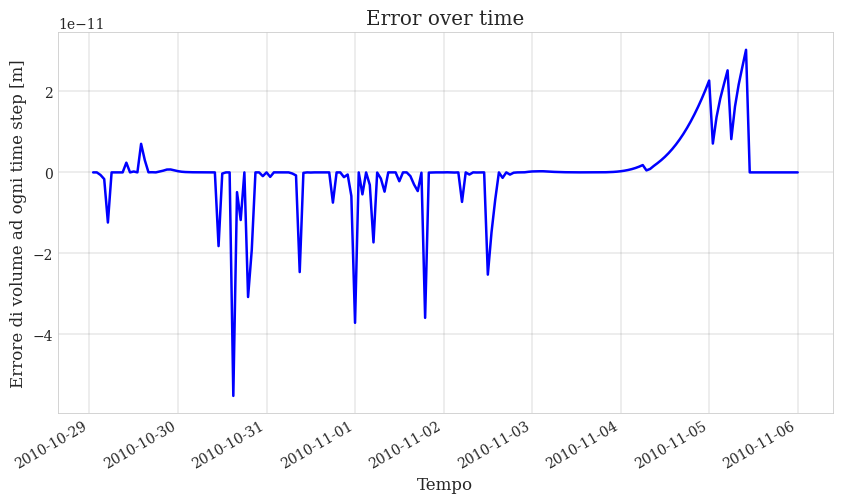

In [7]:
fig = plt.figure(figsize=(10,8/1.618))
ax4 = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('Tempo')
plt.ylabel('Errore di volume ad ogni time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.2)

## **Output**

All'inizio della serie temporale in esame, si considera una colonna di suolo satura nei primi 20 cm ed insatura al di sotto in modo da simulare l'effetto delle piogge dei giorni precedenti all'alluvione. Questa scelta è stata fatta studiando le precipitazioni misurate dalle varie stazioni del territorio Veneto ed osservando che già nei giorni precedenti al 31/10/2010 si erano verificati fenomeni di carattere precipitativo che avavano portato ad una parziale saturazione degli strati di suolo più superficiali.
Come condizioni iniziali si è considerata una suzione ($\psi$) che non ha andamento idrostatico ma che varia linearmente all'interno di ogni strato mentre sul fondo si è scelto di considerare una condizione al contorno di tipo "free drainage" per descrivere il drenaggio dell'acqua dovuto alla forza di gravità.  
  
I grafici di output riportati di seguito hanno lo scopo di:  
- illustrare la variazione del fronte d'acqua, in termini di pressione e contenuto d'acqua, al variare della profondità e dell'istante di tempo considerati;  
- individuare la presenza di deflusso.

## *Suzione*

La suzione è la capacità di un suolo di assorbire acqua, essa è espressa come una pressione negativa, quando il suolo è insaturo, o come una pressione positiva nel caso in cui il suolo sia saturo. Il valore di pressione nulla è associato ad un suolo saturo. Tuttavia, ottenere un valore di suzione attraverso delle misure svolte in sito è molto complesso. 
In seguito, viene rappresentato un grafico 2D che descrive l'andamento della suzione in funzione del tempo e della profondità.

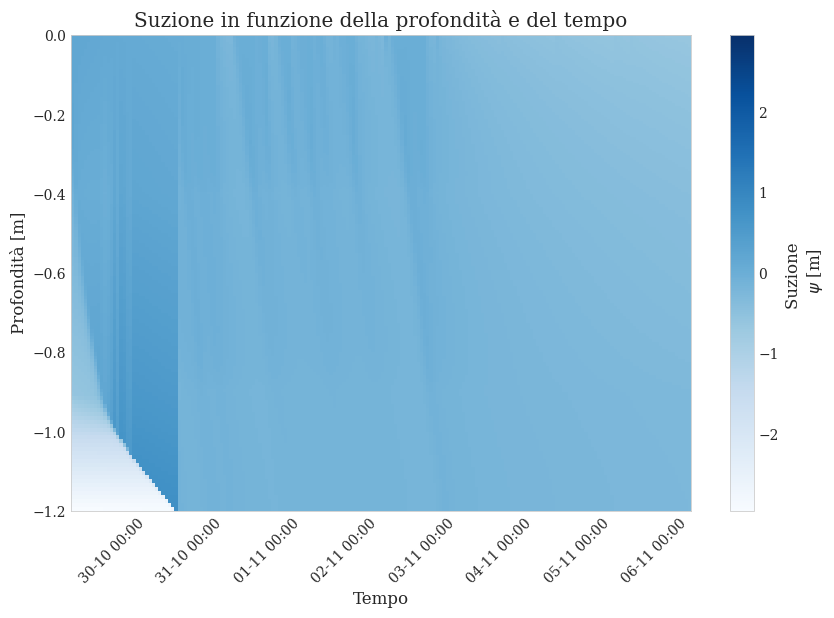

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues', 
            cbar_kwargs={'label': 'Suzione \n $\psi$ [m]'}
           )

ax.set_title('Suzione in funzione della profondità e del tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()

## *Contenuto d'acqua e grado di saturazione del terreno*

In seguito, si rappresenta un grafico 2D che illustra il contenuto d'acqua presente nella colonna di suolo presa in esame in funzione della profondità e del tempo. Si può notare come il contenuto d'acqua sia maggiore negli strati superficiali del suolo comportando una maggiore saturazione del terreno. 

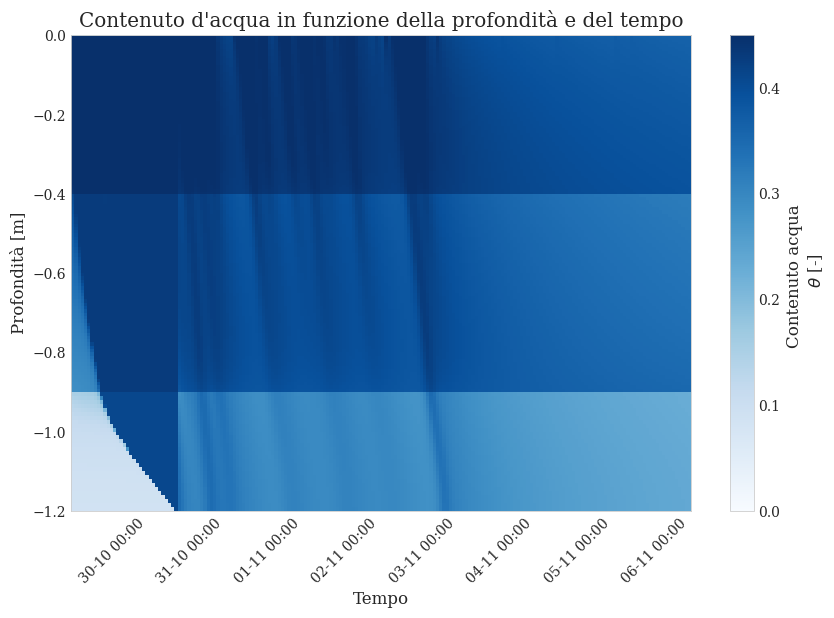

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10/1.618))

ds.theta.plot(ax=ax, y='depth', cmap='Blues', 
            cbar_kwargs={'label': 'Contenuto acqua \n $\\theta$ [-]'}
           )

ax.set_title("Contenuto d'acqua in funzione della profondità e del tempo")
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()

Il grafico 2D che descrive il grado di saturazione del terreno in funzione del tempo e della profondità è affine a quello soprastante data la dipendenza esplicita del grado di saturazione dal contenuto d'acqua.

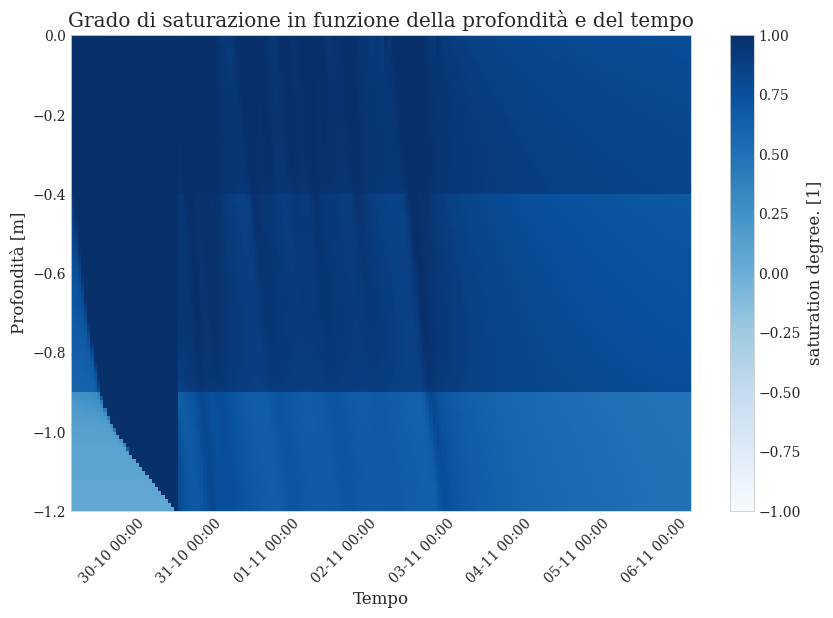

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10/1.618))

ds.saturationDegree.plot(ax=ax, y='depth', cmap='Blues')
ax.set_title('Grado di saturazione in funzione della profondità e del tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_tick_params(rotation=45)


plt.show()

## *Variazione del fronte d'acqua a diversi tempi*

In questa sezione si valuta il movimento del fronte d'acqua in diversi istanti di tempo.  
Con quest'analisi si vuole descrivere la variazione della suzione e del contenuto d'acqua nei diversi strati della colonna di suolo considerata. Noto che la colonna di suolo si trova a Vicenza, per questo studio si sono scelti istanti di tempo sia precedenti che successivi all'evento di esondazione del Bacchiglione. 

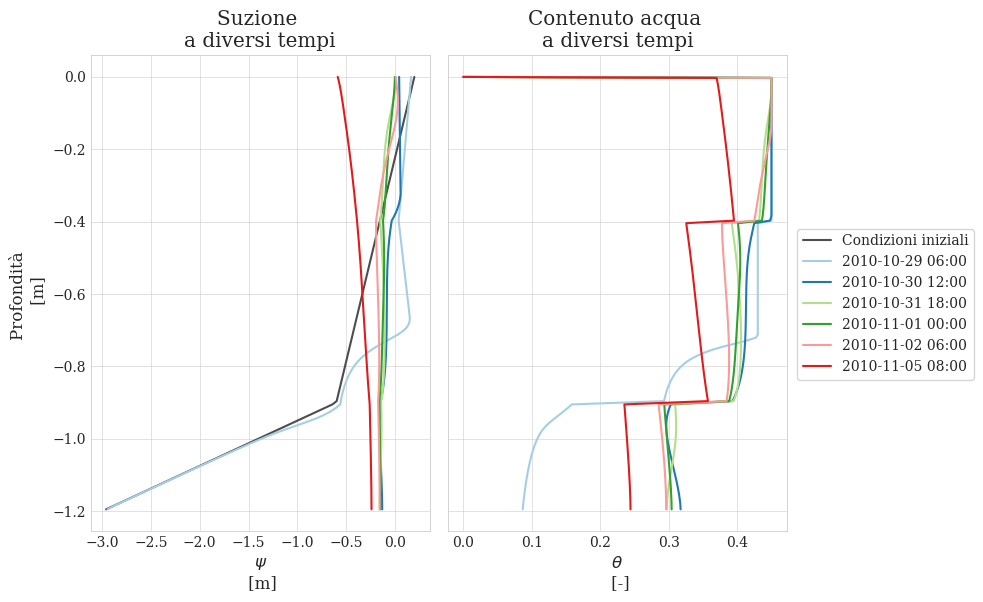

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
ds.psi.sel(time='2010-10-29 06:00').plot(ax=ax1, y='depth', label='2010-10-29 06:00', color=colors[0])
ds.psi.sel(time='2010-10-30 12:00').plot(ax=ax1, y='depth', label='2010-10-30 12:00', color=colors[1])
ds.psi.sel(time='2010-10-31 18:00').plot(ax=ax1, y='depth', label='2010-10-31 18:00', color=colors[2])
ds.psi.sel(time='2010-11-01 00:00').plot(ax=ax1, y='depth', label='2010-11-01 00:00', color=colors[3])
ds.psi.sel(time='2010-11-02 06:00').plot(ax=ax1, y='depth', label='2010-11-02 06:00', color=colors[4])
ds.psi.sel(time='2010-11-05 08:00').plot(ax=ax1, y='depth', label='2010-11-05 08:00', color=colors[5])

ax1.set_title('Suzione \na diversi tempi')

ax1.set_ylabel('Profondità \n [m]')
ax1.set_xlabel('$\psi$ \n [m]')

plt.plot(np.nan, np.nan, label='Condizioni iniziali', color='0.3')
ds.theta.sel(time='2010-10-29 06:00').plot(ax=ax2, y='depth', label='2010-10-29 06:00', color=colors[0])
ds.theta.sel(time='2010-10-30 12:00').plot(ax=ax2, y='depth', label='2010-10-30 12:00', color=colors[1])
ds.theta.sel(time='2010-10-31 18:00').plot(ax=ax2, y='depth', label='2010-10-31 18:00', color=colors[2])
ds.theta.sel(time='2010-11-01 00:00').plot(ax=ax2, y='depth', label='2010-11-01 00:00', color=colors[3])
ds.theta.sel(time='2010-11-02 06:00').plot(ax=ax2, y='depth', label='2010-11-02 06:00', color=colors[4])
ds.theta.sel(time='2010-11-05 08:00').plot(ax=ax2, y='depth', label='2010-11-05 08:00', color=colors[5])

ax2.set_title('Contenuto acqua \na diversi tempi')
ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ \n [-]')

plt.tight_layout()
plt.show()

## *Variazione del fronte d'acqua a diverse profondità*

In questa sezione si valuta il movimento del fronte d'acqua a diverse profondità.  
Per l'analisi si sono scelti valori di profondità che consentono di descrivere la variazione della suzione e del contenuto d'acqua nei diversi strati della colonna di suolo considerata:  
· le profondità di $-0.1m$ e $-0.2m$ si riferiscono al primo strato, quello più superficiale;  
· le profondità di $-0.5m$ e $-0.8m$ si riferiscono al secondo strato;  
· la profondità di $-1.0m$ si riferisce al terzo e utimo strato.

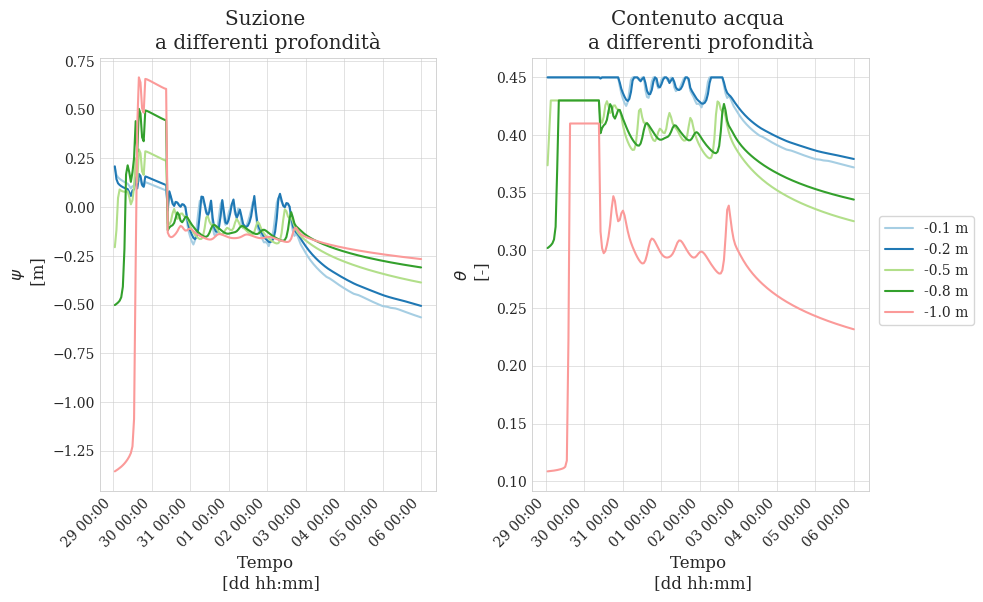

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-0.8, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.0, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Suzione \na differenti profondità')


ax1.set_ylabel('$\psi$ \n [m]')
ax1.set_xlabel('Tempo \n [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-0.8, method='nearest').plot(ax=ax2, label = '-0.8 m', color=colors[3])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[4])

ax2.set_title('Contenuto acqua \na differenti profondità')


ax2.set_ylabel('$\\theta$ \n [-]')
ax2.set_xlabel('Tempo \n [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

## *Confronto tra precipitazioni e suzione*

In [13]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/precip_2906vi.csv',datetime_index=False)
rain.head()

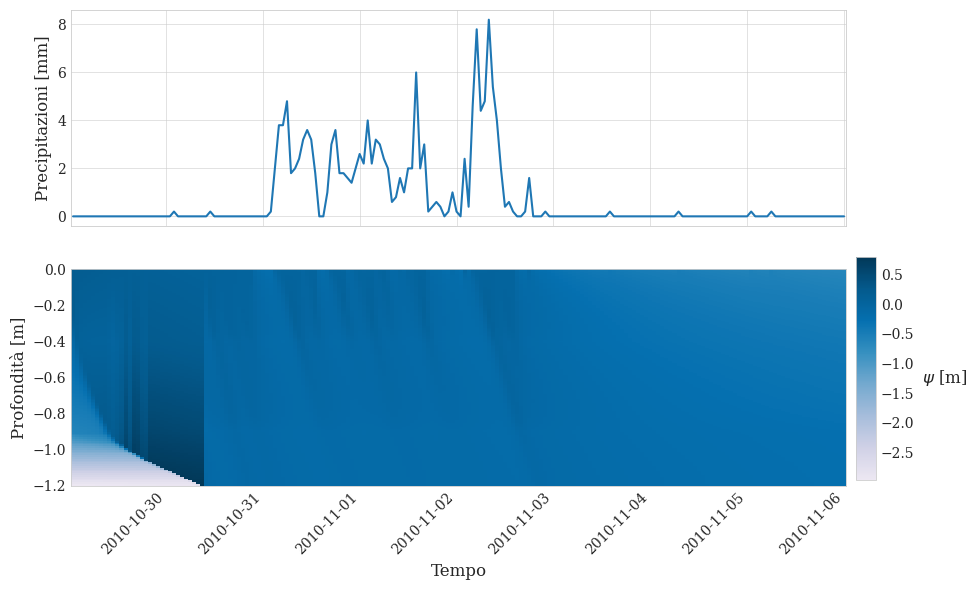

In [14]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Precipitazioni [mm]')


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)

ax[1].set_ylabel('Profondità [m]')
ax[1].set_xlabel('Tempo')



ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.36])

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.show()

In seguito, si riporta un grafico che mette in relazione la variazione della suzione nel tempo a diverse profondità. 

In [15]:
myDepth = [-0.25,-0.50,-1.00,-3.00]

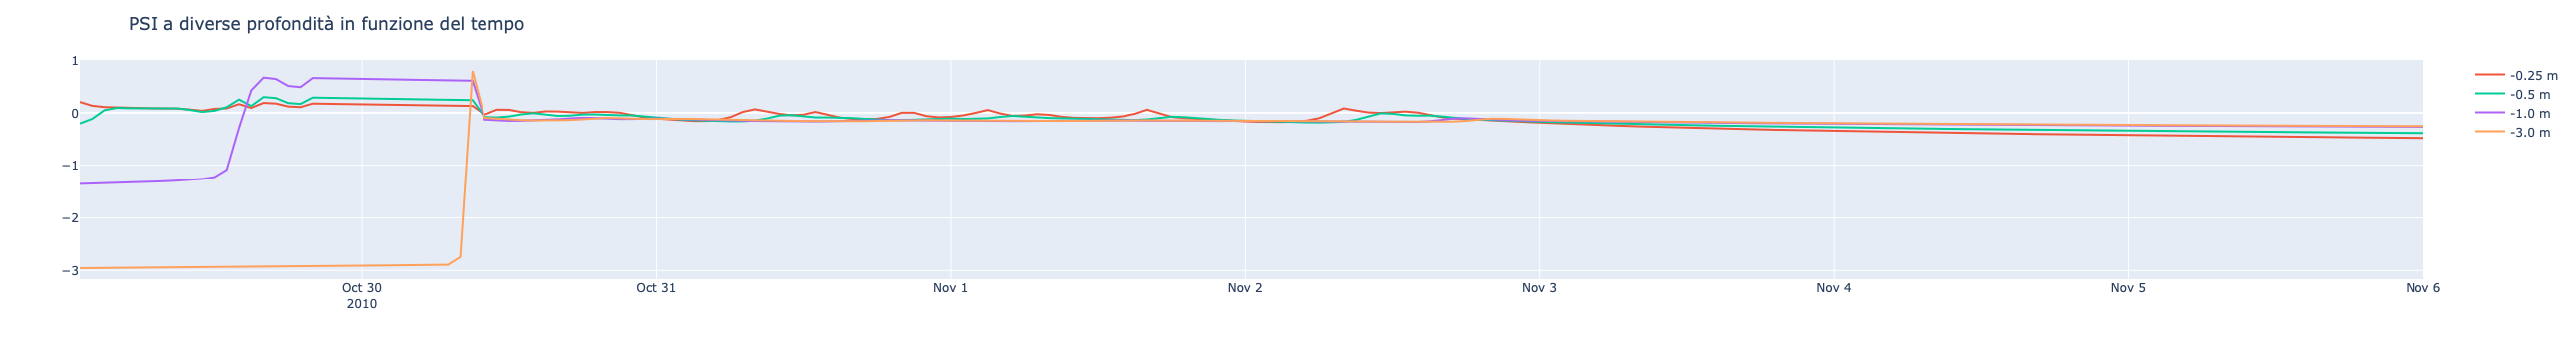

In [16]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.psi.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'PSI a diverse profondità in funzione del tempo')
fig.show()

Infine, si va a riportare una grafico che descrive come varia il grado di saturazione a diverse profondità del terreno durante la durata della nostra simulazione. Risulta importante notare l'elevato grado di saturazione nei diversi strati di terreno considerati e come nello strato più superficiale il terreno si presentava già saturo a causa dei fenomeni precipitativi precedenti all'esondazione.  
Si può notare che nei giorni seguenti all'esondazione il grado di saturazione diminuisce gradualmente nei vari strati di suolo.

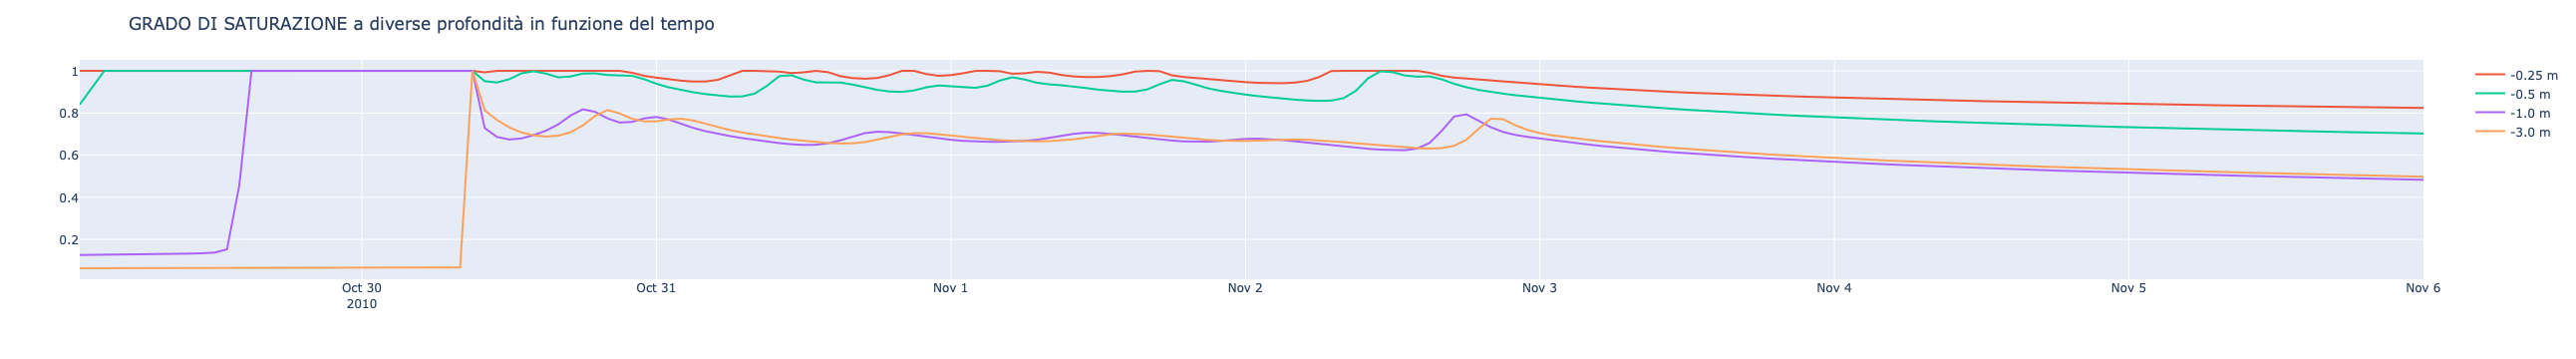

In [17]:
fig = px.line()
for i in range (0,len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time.values[:], y=ds.saturationDegree.sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]) , mode='lines', name=str(myDepth[i])+' m'))
    
fig.update_layout(title= 'GRADO DI SATURAZIONE a diverse profondità in funzione del tempo')
fig.show()

## *Top flux*

In seguito, viene rappresentato un grafico che descrive la variazione e l'andamento della velocità di Darcy durante la durata della nostra simulazione. La velocità di Darcy viene definita come il flusso attraverso area unitaria del mezzo poroso quindi non è altro che la velocità di deflusso della precipitazione attraverso il terreno. 

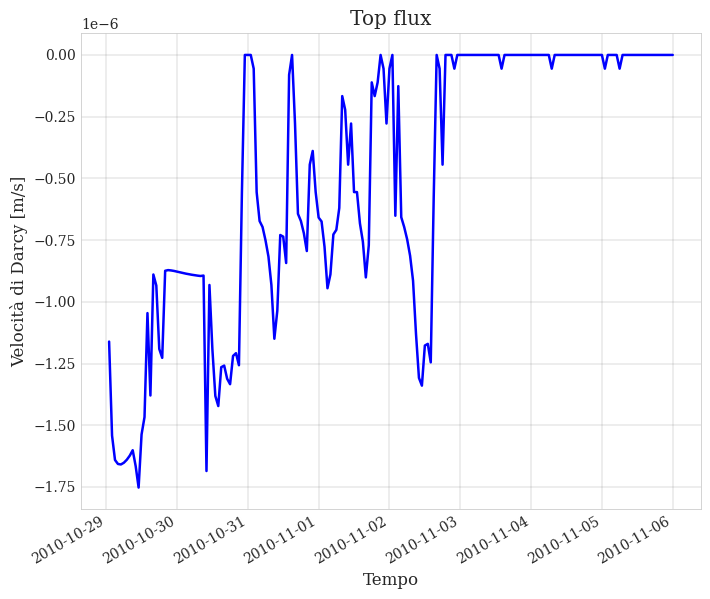

In [18]:
fig = plt.figure(figsize=(8,10/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.ylabel('Velocità di Darcy [m/s]')
plt.xlabel('Tempo')
plt.grid(color='grey', linestyle='-', linewidth=0.2)


Dal grafico soprastante si possono notare dei picchi di velocità soprattutto a seguito dei diversi fenomeni precipitativi orari. Si può notare che la velocità di darcy torna ad essere prossima allo zero gradualmente nei giorni seguenti alla precipitazione. 